<a href="https://colab.research.google.com/github/MustafaJ98/ECSE415_Computer_Vision/blob/master/Assignemt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECSE 415 Intro to Computer Vision

Assignemt 2

Author: Mustafa Javed

Images provided by Prof James J. Clark

In [ ]:
!pip install opencv-python==4.4.0.44
!pip install opencv-contrib-python==4.4.0.44

In [1]:
#import libraries
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cv2
import numpy as np
import os

#mount drive
from google.colab import drive
drive.mount('/content/drive')

#define images path. Edit this path according to the folder where images are stored
path = '/content/drive/My Drive/ECSE 415/Assignment 2/'

Mounted at /content/drive


## 1. Invariance of SIFT Features###

### 1.1 Invariance Under Changes in Scale ###


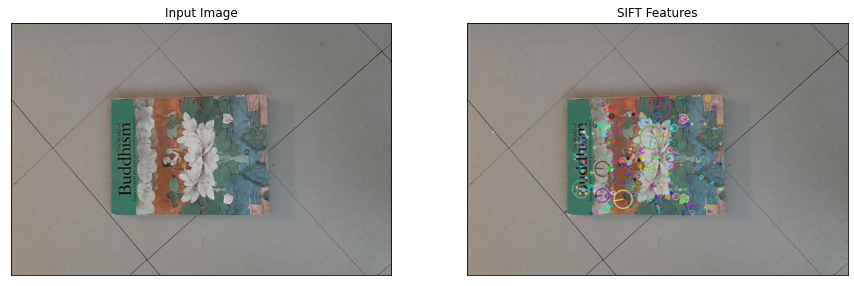

In [ ]:
# read image into variable. Apply a grayscale filter
img = cv2.imread(path + '/book.jpg')

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_disp = img.copy()

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features
keypoints = sift.detect(img, None)

# draw the keypoints
cv2.drawKeypoints(img, keypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# display
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.show()

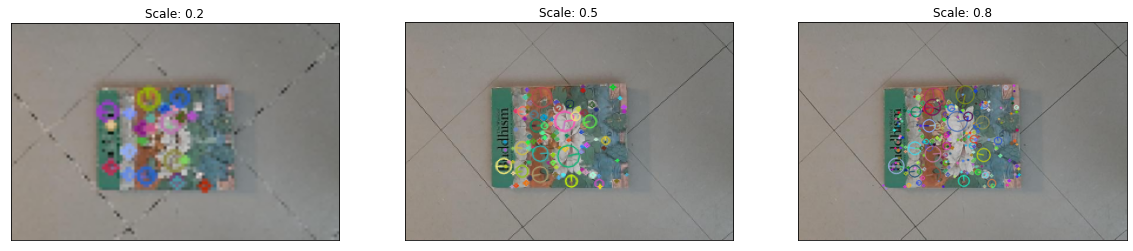

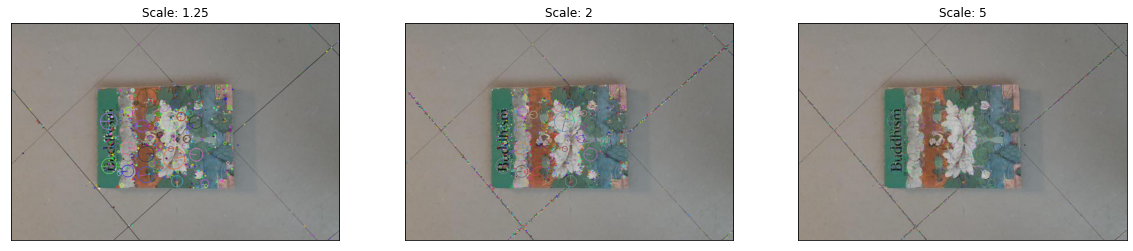

In [ ]:
# read image into variable. Apply a grayscale filter
img = cv2.imread(path + '/book.jpg')

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Scale images

scales = (0.2, 0.5, 0.8, 1.25, 2, 5)

scaled_images = []

# make a list of all scaled images
for scale in scales:
  image = cv2.resize(img, (0, 0), fx = scale, fy = scale)
  scaled_images.append(image)

# convert into array
scaled_images = np.array(scaled_images)
scaled_images_disp = scaled_images.copy()

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

for i in range(0, len(scaled_images)):
  # detect SIFT features
  keypoints = sift.detect(scaled_images[i], None)

  # draw the keypoints
  cv2.drawKeypoints(scaled_images[i], keypoints, scaled_images_disp[i], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# display
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(scaled_images[0])
plt.title("Scale: 0.2"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(scaled_images[1])
plt.title("Scale: 0.5"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(scaled_images[2])
plt.title("Scale: 0.8"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(scaled_images[3])
plt.title("Scale: 1.25"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(scaled_images[4])
plt.title("Scale: 2"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(scaled_images[5])
plt.title("Scale: 5"), plt.xticks([]), plt.yticks([])
plt.show()

354.4122009277344
252.5846405029297
50.990196228027344
49.234134674072266
38.35361862182617
49.09175109863281


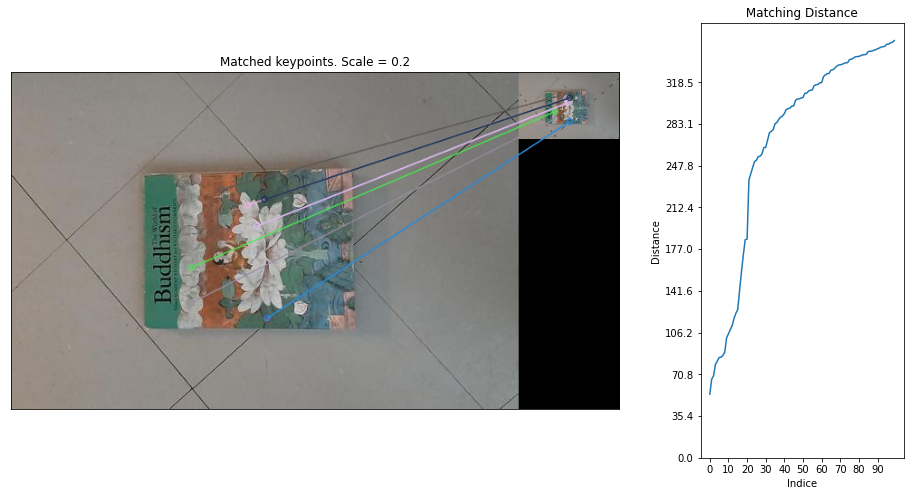

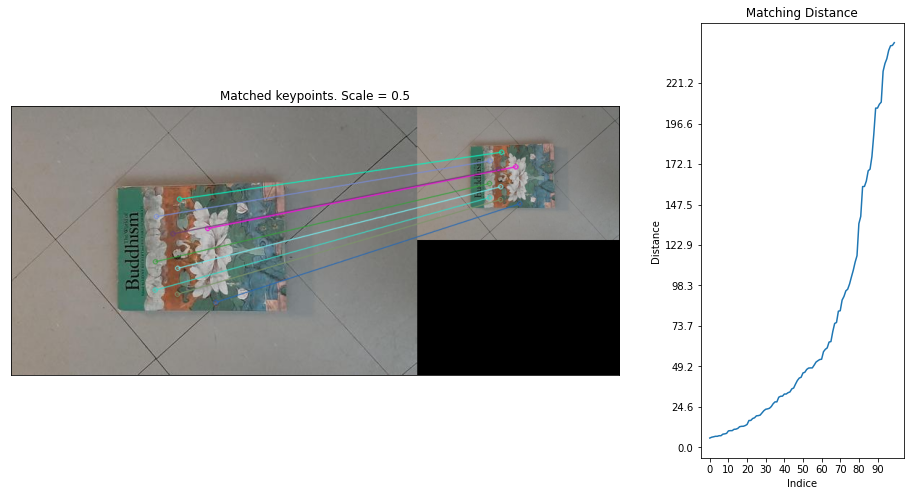

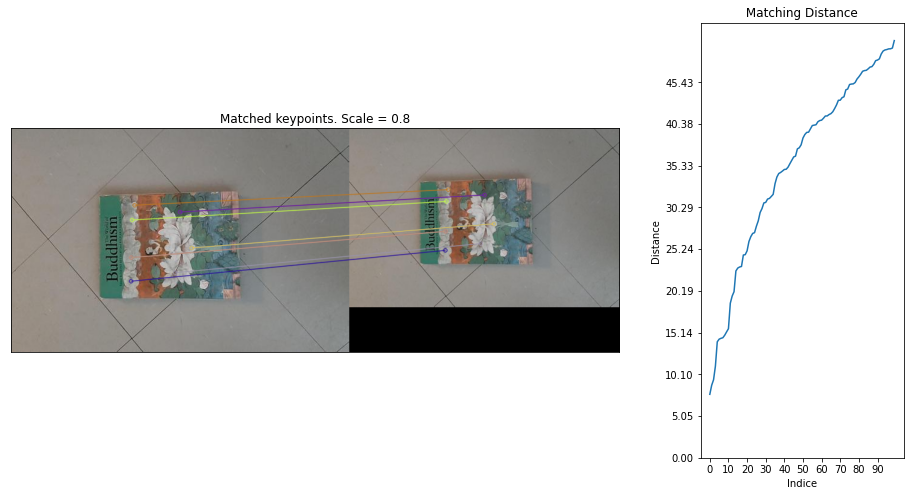

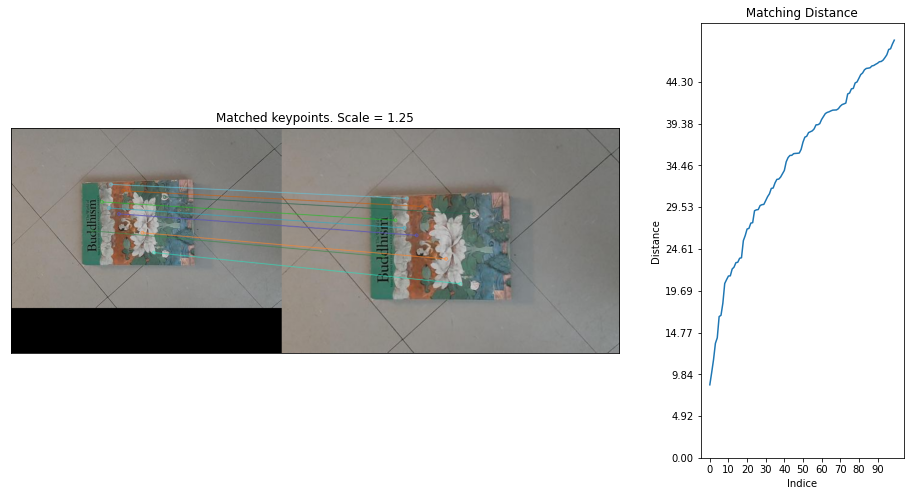

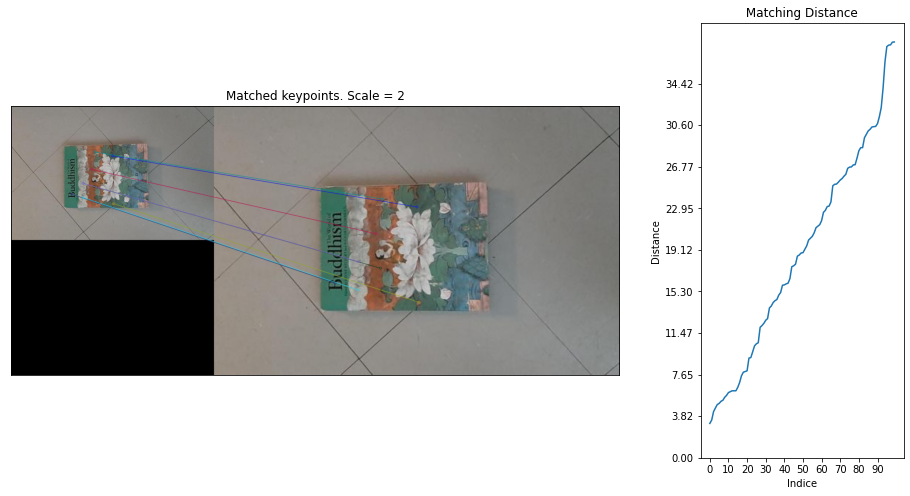

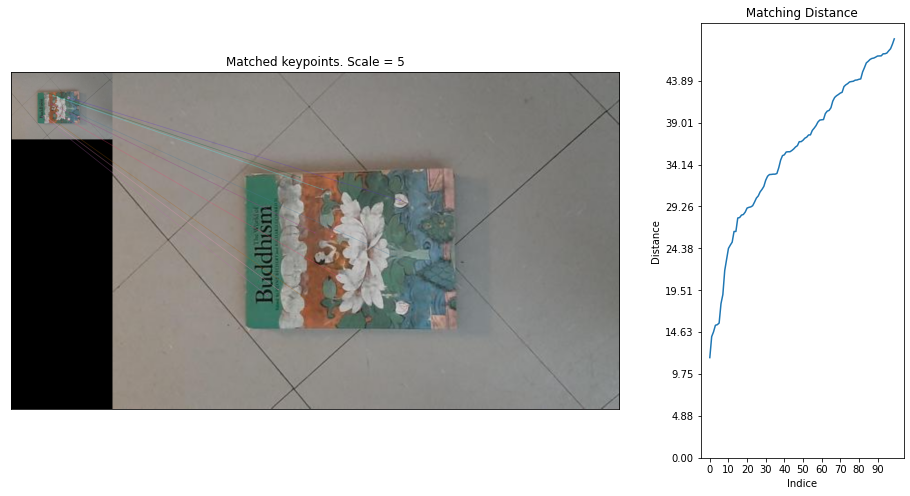

In [ ]:
# 4. Match all keypoints of the reference image to the transformed images using
# a brute-force method.

# read image into variable. Apply a grayscale filter
img = cv2.imread(path + '/book.jpg')

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Scale images

scales = (0.2, 0.5, 0.8, 1.25, 2, 5)

scaled_images = []

# make a list of all scaled images
for scale in scales:
  image = cv2.resize(img, (0, 0), fx = scale, fy = scale)
  scaled_images.append(image)

# convert into array
#scaled_images = np.array(scaled_images)
scaled_images_disp = scaled_images.copy()

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

keypoints_ref_image,descriptors_ref_image = sift.detectAndCompute(img, None)

# creating a BFMatcher object
bf = cv2.BFMatcher()

# array to keep data of matching distance
matching_dist=[]

for i in range(0, len(scaled_images)):
  # detect SIFT features
  img2 = scaled_images[i]
  keypoints,descriptors = sift.detectAndCompute(img2, None)
  matches = bf.match(descriptors_ref_image,descriptors)
  matches = sorted(matches, key = lambda x:x.distance)
  
# Draw first 10 matches.
  matched_pics = cv2.drawMatches(img,keypoints_ref_image,img2,keypoints, matches[:10], None, flags=2)
  
  distance=[]
  for x in matches [:100]:
    distance.append(x.distance)
 
  print(matches[100].distance) 
  plt.figure(figsize=(16,8))
  gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
  ax0 = plt.subplot(gs[0])
  ax0.imshow(matched_pics)
  plt.title("Matched keypoints. Scale = " + str(scales[i])), plt.xticks([]), plt.yticks([])
  ax1 = plt.subplot(gs[1])
  ax1.plot(distance)
  plt.title(" Matching Distance "), plt.xticks([]), plt.yticks([])
  ax1.set_ylabel('Distance')
  ax1.set_xlabel('Indice')
  ax1.set_yticks(np.arange(0, max(distance),max(distance)/10 ))
  ax1.set_xticks(np.arange(0, 100, 10))
# # numner of SIFT keypoints
# for a in range(0, len(scales)):
#     print('Num keypoints for scale '+str(scale[a])+": "+ str(len(keypoints2[a])))  




##Discuss the trend in the plotted results. What is the effect of increasing the scale on the matching distance? Reason the cause.

The matching distance increases rapildly over the initial indices.
The matching distance vaires over a match larger range for a scaling factor of less than 1. For example for scaling factor of 0.5, matching distance goes upto 252 and for a scaling factor of 2 the distance goes up to 38. 
For a scale near 1, we get a much lower matching trend since the pixels patterns and sift descriptors are very similar.
We lose many pixels when using a small scale value and therfore a large matching distance is seen for small scale.   


## 1.2 Invariance Under Rotation

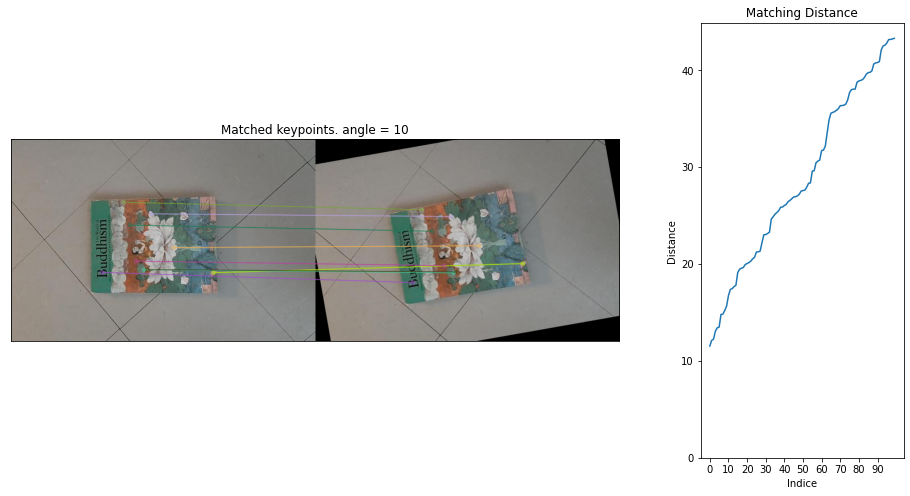

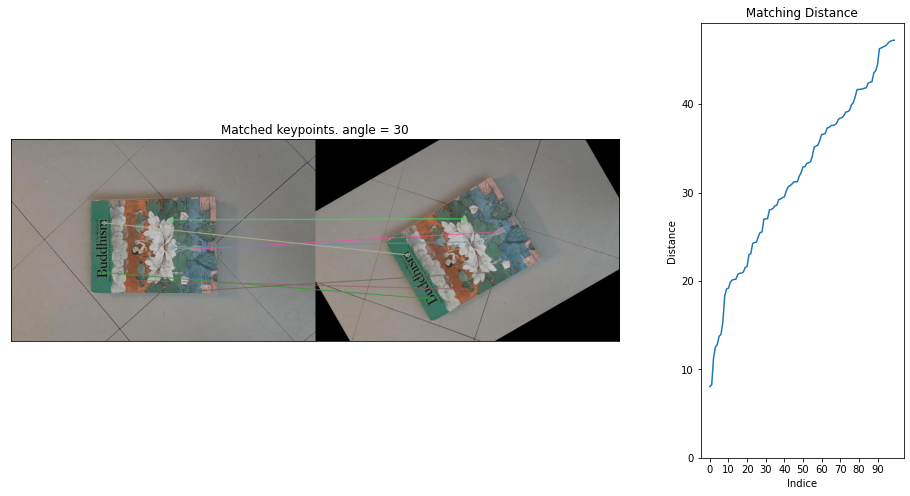

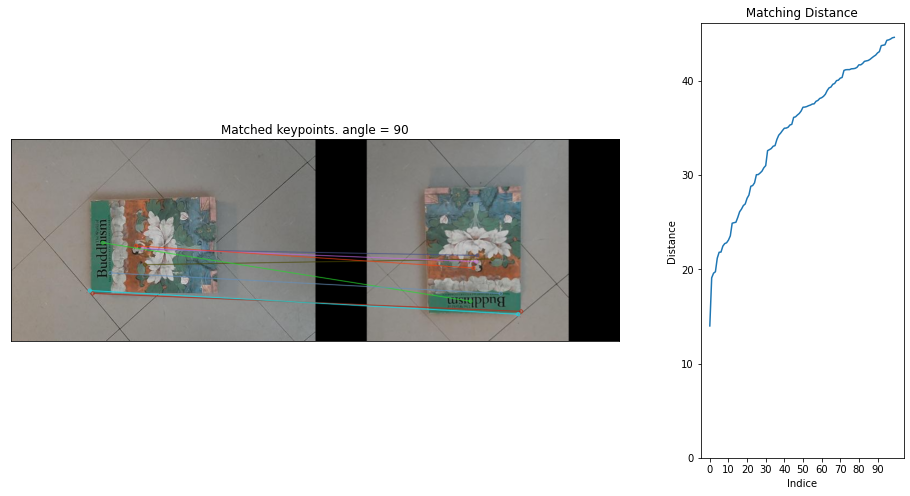

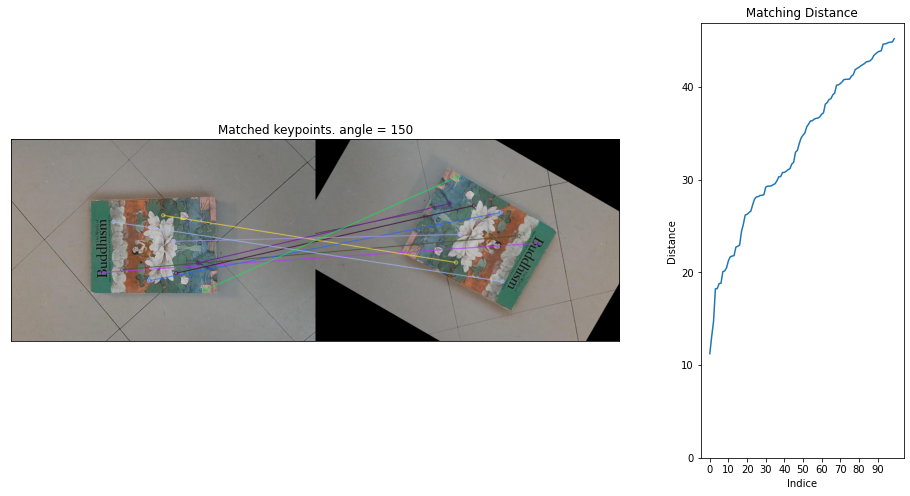

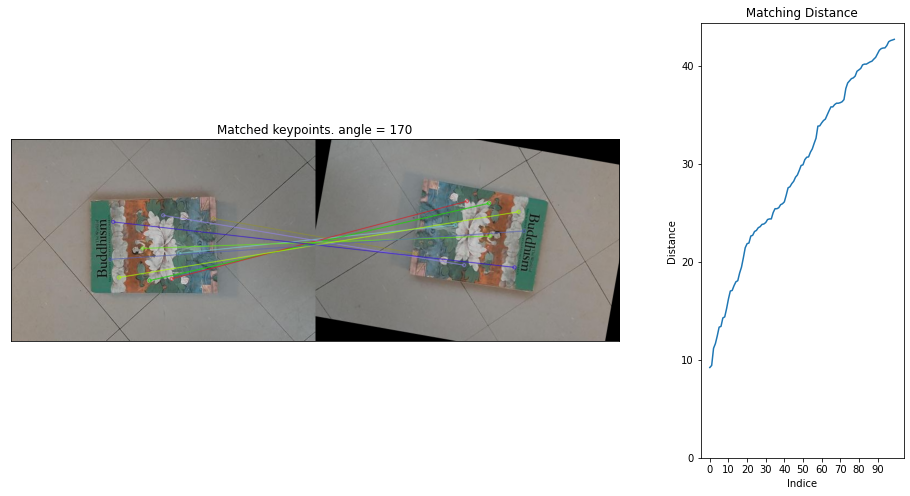

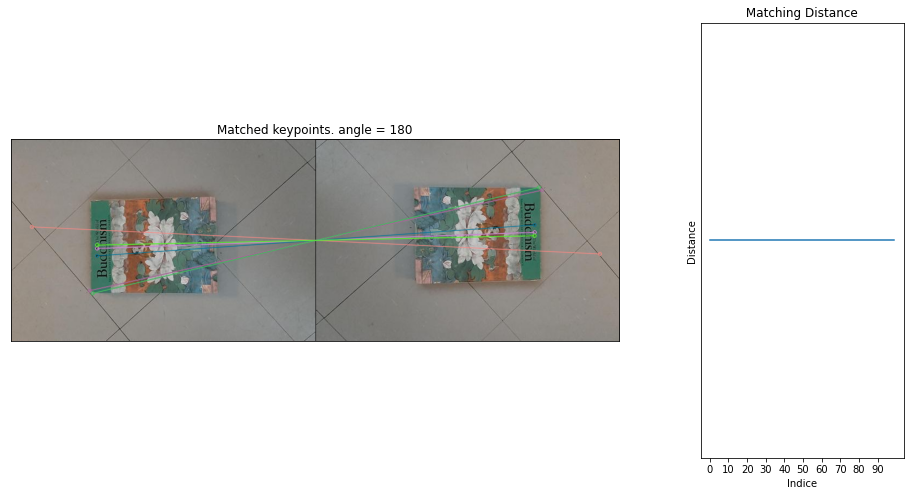

In [ ]:

# read image into variable. Apply a grayscale filter
img = cv2.imread(path + '/book.jpg')

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#image size
height, width = img.shape[0:2]

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

keypoints_ref_image,descriptors_ref_image = sift.detectAndCompute(img, None)


#rotate images
angles = (10, 30, 90, 150, 170, 180)

rotated_images = []

# make a list of all scaled images
for angle in angles:
  M = cv2.getRotationMatrix2D((width/2,height/2),angle,1)
  image = cv2.warpAffine(img,M,(width,height))
  rotated_images.append(image)

# convert into array
#rotated_images = np.array(scaled_images)
rotated_images_disp = rotated_images.copy()

# creating a BFMatcher object
bf = cv2.BFMatcher()

for i in range(0, len(rotated_images)):
  # detect SIFT features
  img2 = rotated_images[i]
  keypoints,descriptors = sift.detectAndCompute(img2, None)
  matches = bf.match(descriptors_ref_image,descriptors)
  matches = sorted(matches, key = lambda x:x.distance)
  
# Draw first 10 matches.
  matched_pics = cv2.drawMatches(img,keypoints_ref_image,img2,keypoints, matches[:10], None, flags=2)
  
  distance=[]
  for x in matches [:100]:
    distance.append(x.distance)

  #plot images
  plt.figure(figsize=(16,8))
  gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
  ax0 = plt.subplot(gs[0])
  ax0.imshow(matched_pics)
  plt.title("Matched keypoints. angle = " + str(angles[i])), plt.xticks([]), plt.yticks([])
  ax1 = plt.subplot(gs[1])
  ax1.plot(distance)
  plt.title(" Matching Distance "), plt.xticks([]), plt.yticks([])
  ax1.set_ylabel('Distance')
  ax1.set_xlabel('Indice')
  ax1.set_yticks(np.arange(0, max(distance), 10 ))
  ax1.set_xticks(np.arange(0, 100, 10))
 
  

### Discuss the trend in the plotted results. What is the effect of increasing the angle of rotation on the matching distance? Reason the cause.

The sotrted matching distance increases with the indice in a approximately linear trend. 
The matching distance does not ary much with changing angle and remain with in 50. The reason for this trendd is that all the sift decsritors have similar feature but different angles. 
The differnece is largest for 90 degree rotation since this is the maximum absolute angle between the reference image and rotated image.
Notably the matching distance for 180 degree rotation is 0 for all indices which is reasonable since image is a mirror copy and sift descriptors are same.  


## 2. Matching using SIFT - Book Reveal

384


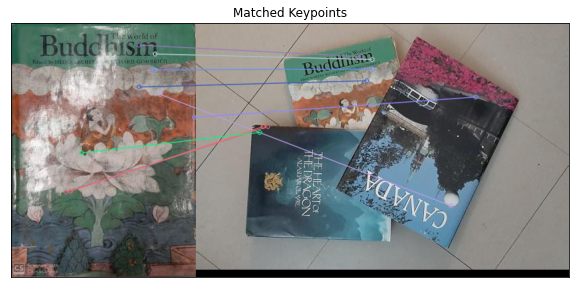

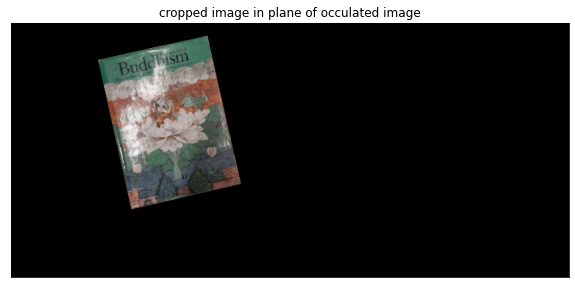

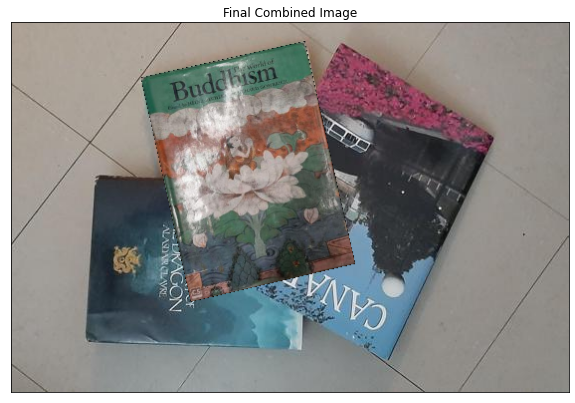

In [ ]:
# Read images 
refimg = cv2.imread(path+'book.jpg')
occimg = cv2.imread(path+'book_occlusion.jpg')
crpimg = cv2.imread(path+'book_crop.jpg')
#convert to RGB
refimg = cv2.cvtColor(refimg, cv2.COLOR_BGR2RGB)
occimg = cv2.cvtColor(occimg, cv2.COLOR_BGR2RGB)
crpimg = cv2.cvtColor(crpimg, cv2.COLOR_BGR2RGB)

# Finding Kepoints
sift_obj = cv2.xfeatures2d.SIFT_create()

keypoints_refimg, descriptors_refimg = sift_obj.detectAndCompute(refimg, None)
keypoints_occimg, descriptors_occimg = sift_obj.detectAndCompute(occimg, None)
keypoints_crpimg, descriptors_crpimg = sift_obj.detectAndCompute(crpimg, None)

print(len(keypoints_refimg))
# create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches_crpimg_occimg = bf.match(descriptors_crpimg, descriptors_occimg)
matches_refimg_occimg = bf.match(descriptors_refimg, descriptors_occimg)

# Sort them in the order of their distance.
matches_crpimg_occimg = sorted(matches_crpimg_occimg, key = lambda x:x.distance)
matches_refimg_occimg = sorted(matches_refimg_occimg, key = lambda x:x.distance)

# Draw keypoints 
imgmatch = cv2.drawMatches(crpimg,keypoints_crpimg, occimg, keypoints_occimg, matches_crpimg_occimg[:10], None, flags=2)

plt.figure(figsize=(10,10))
plt.imshow(imgmatch)
plt.title("Matched Keypoints"), plt.xticks([]), plt.yticks([])
plt.show()

# Find good matches and arrange matches
GoodMatches = []
for i, m in enumerate(matches_refimg_occimg):
    if m.distance < 1000:
        GoodMatches.append((m.trainIdx, m.queryIdx))

mp1 = np.float32([keypoints_refimg[i].pt for (__ , i) in GoodMatches])
mp2 = np.float32([keypoints_occimg[i].pt for (i, __) in GoodMatches])

# find homography and wrap image accordingly

H, __ = cv2.findHomography(mp1, mp2, cv2.RANSAC, 4)
wimg = cv2.warpPerspective(refimg, H, (occimg.shape[1],occimg.shape[0]))

# compute the keypoints and descriptors of the new image
keypoints_wimg, descriptors_wimg = sift.detectAndCompute(wimg, None)
match_crpimg_wimg = bf.match(descriptors_crpimg, descriptors_wimg)
match_crpimg_wimg = sorted(match_crpimg_wimg, key = lambda x:x.distance)
img_x = cv2.drawMatches(crpimg,keypoints_crpimg, wimg, keypoints_wimg, match_crpimg_wimg[:10], None, flags=2)

# Arrange the matching keypoints in two separate lists
new_good_points = []
for i, m in enumerate(match_crpimg_wimg):
    if m.distance < 1000:
        new_good_points.append((m.trainIdx, m.queryIdx))
        
mp1 = np.float32([keypoints_crpimg[i].pt for (__, i) in new_good_points])
mp2 = np.float32([keypoints_wimg[i].pt for (i, __) in new_good_points])

# find homography and wrap image accordingly
H, _ = cv2.findHomography(mp1, mp2, cv2.RANSAC, 4)
wimg = cv2.warpPerspective(crpimg, H, (crpimg.shape[1]+wimg.shape[1],crpimg.shape[0]))


plt.figure(figsize=(10,10))
plt.imshow(wimg)
plt.title("cropped image in plane of occulated image"), plt.xticks([]), plt.yticks([])
plt.show()

displayImage = occimg.copy()
height, width, depth = occimg.shape

for i in range(0, height):
    for j in range(0, width):
        for k in range(0, depth):
            if wimg[i,j,k] != 0:
                displayImage[i,j,k] = wimg[i,j,k]
                
plt.figure(figsize=(10,10))
plt.imshow(displayImage)
plt.title("Final Combined Image"), plt.xticks([]), plt.yticks([])  
plt.show()  

## 3.1 Eigenface Representation

In [ ]:
#load images
path = '/content/drive/My Drive/ECSE 415/Assignment 2/Celebs/'

numberOfImages = 100
image_size =  218, 178
images = np.zeros((numberOfImages, image_size[0], image_size[1]),dtype='float64')

#create a list of filenames
filenames = []
for filename in os.listdir(path):
  filenames.append(path + filename)

for i in range(0,numberOfImages):
  # Read images 
  img = cv2.imread(filenames[i])
  #convert to RGB
  images[i] = (cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

total_images = len(images)
print(images.shape)

(100, 218, 178)


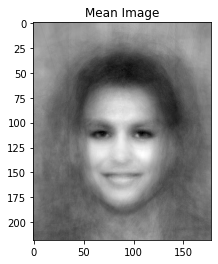

In [ ]:
# A matrix of image dataset
D = np.resize(images, (total_images, image_size[0]*image_size[1]))

# convert to Matrix with images as columns
D = D.T

#plt.imshow(np.resize( D[:,0], (image_size[0],image_size[1])),cmap='gray')
#plt.show()

# Finding the average face
# mean_matrix = np.tile(mean_vector, (1, total_images))
mean_vector = (D.mean(axis=1))
mean_vector = np.resize(mean_vector, ( image_size[0]*image_size[1],1) )

#print((mean_vector).shape)
mean_matrix = np.tile(mean_vector, total_images)

#print(mean_matrix.shape)

#mean-subtracted image vectors
meanSub = D - mean_matrix 
plt.imshow(np.resize(mean_vector, (image_size[0],image_size[1])), cmap='gray') #show the mean image vector
plt.title('Mean Image')
plt.show()

#Find eigenvector and eigenvalue of D^t*D*D^t
DtD = np.matmul(D.T, D)
#print(DtD.shape) 

eigenvalues, eigenvectors = np.linalg.eig(DtD)

#sort the eigenvalues and eigenvector in descending order
pos = eigenvalues.argsort()[::-1] 
eigenvalues = eigenvalues[pos] 
eigenvectors = eigenvectors[:, pos]

K_eigenvectors = eigenvectors[:,0:7]
K_eigenvectorsD =D.dot(K_eigenvectors)

#print(meanSub.shape)
#print(K_eigenvectorsD.shape)

# convert eigenvectors to eigenfaces
eigenfaces = (meanSub).dot(K_eigenvectors)
#print(eigenfaces.shape)




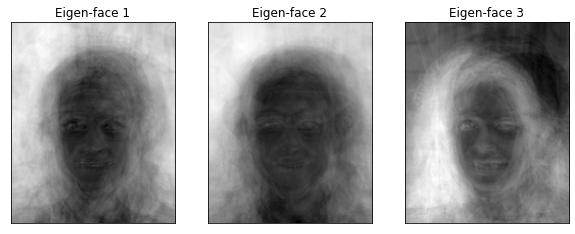

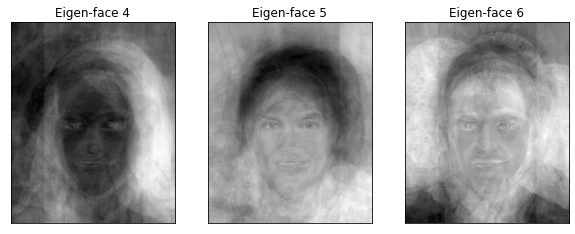

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(eigenfaces[:,0].reshape(image_size[0],image_size[1]), cmap = 'gray')
plt.title("Eigen-face 1"), plt.xticks([]), plt.yticks([])    
plt.subplot(132)
plt.imshow(eigenfaces[:,1].reshape(image_size[0],image_size[1]), cmap = 'gray')
plt.title("Eigen-face 2"), plt.xticks([]), plt.yticks([])    
plt.subplot(133)
plt.imshow(eigenfaces[:,2].reshape(image_size[0],image_size[1]), cmap = 'gray')
plt.title("Eigen-face 3"), plt.xticks([]), plt.yticks([])    
plt.show()
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(eigenfaces[:,3].reshape(image_size[0],image_size[1]), cmap = 'gray')
plt.title("Eigen-face 4"), plt.xticks([]), plt.yticks([])    
plt.subplot(132)
plt.imshow(eigenfaces[:,4].reshape(image_size[0],image_size[1]), cmap = 'gray')
plt.title("Eigen-face 5"), plt.xticks([]), plt.yticks([])    
plt.subplot(133)
plt.imshow(eigenfaces[:,5].reshape(image_size[0],image_size[1]), cmap = 'gray')
plt.title("Eigen-face 6"), plt.xticks([]), plt.yticks([])    
plt.show()

## 3.2 Face Detection



In [ ]:
def pca(dataset_path,k):
  #load images
  path = dataset_path
  numberOfImages = 100
  image_size =  218, 178
  images = np.zeros((numberOfImages, image_size[0], image_size[1]),dtype='float64')
  
  #create a list of filenames
  filenames = []
  for filename in os.listdir(path):
   filenames.append(path + filename)

  for i in range(0,numberOfImages):
    # Read images 
    img = cv2.imread(filenames[i])
    #convert to RGB
    images[i] = (cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

  total_images = len(images)

  # A matrix of image dataset
  D = np.resize(images, (total_images, image_size[0]*image_size[1]))

  # convert to Matrix with images as columns
  D = D.T

  # Finding the average face
  mean_vector = (D.mean(axis=1))
  mean_vector = np.resize(mean_vector, ( image_size[0]*image_size[1],1) )

  mean_matrix = np.tile(mean_vector, total_images)

  #mean-subtracted image vectors
  meanSub = D - mean_matrix 

  #Find eigenvector and eigenvalue of D^t*D*D^t
  DtD = np.matmul(D.T, D)
  #print(DtD.shape) 

  eigenvalues, eigenvectors = np.linalg.eig(DtD)

  #sort the eigenvalues and eigenvector in descending order
  pos = eigenvalues.argsort()[::-1] 
  eigenvalues = eigenvalues[pos] 
  eigenvectors = eigenvectors[:, pos]

  K_eigenvectors = eigenvectors[:,0:k]
  K_eigenvectorsD =D.dot(K_eigenvectors)

  print(meanSub.shape)
  #print(K_eigenvectorsD.shape)

  eigenfaces = (meanSub).dot(K_eigenvectors)
  #print(eigenfaces.shape)

  weights = (meanSub.T).dot(eigenfaces)
  # plt.imshow(eigenfaces[:,5].reshape(image_size[0],image_size[1]), cmap = 'gray')
  # plt.show()

  return eigenfaces,weights, mean_vector, D

# slide a window over the image and check difference with eigenfaces usings detect face method
def sliding_window(image,winW, winH, T1, T2, D, mean_face, eigenfaces):
    # Loop a window over image
    for y in range(0, image.shape[0], 40):
        for x in range(0, image.shape[1], 40):
          window = image[y:y + winH, x:x + winW]
          
          # check if window shape is correct. At corners, window can contain empty pixels. 
          # reject such windnows
          if window.shape[0] != winH or window.shape[1] != winW:
            continue
          
          # Call the detect method to get difference in weight
          diffweight = detect_face(window,mean_face,eigenfaces, D)/10000000

          #compare weight with threshold 
          if (diffweight>T1  and diffweight<T2):
             # Add a bounding boxes around detected faces
             cv2.rectangle(image, (x, y), (x + winW, y + winH), (0, 255, 0), 2)     
    return image


def detect_face(image,mean_face,eigenfaces,D):
    
    test_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_img = np.resize(test_img,(test_img.shape[0]*test_img.shape[1],1))
    
    test_normalized_face_vector = test_img - mean_face
    
    # pre-multiply test image with D as the PCA is trained for D^t*D  
    test_img = (D.T).dot(test_img)
    test_weight = (test_normalized_face_vector.T).dot(eigenfaces)
    
    # return mean differnece of weights between test image and eigenfaces 
    return np.linalg.norm(test_weight - weights, axis=1).mean()




(38804, 100)


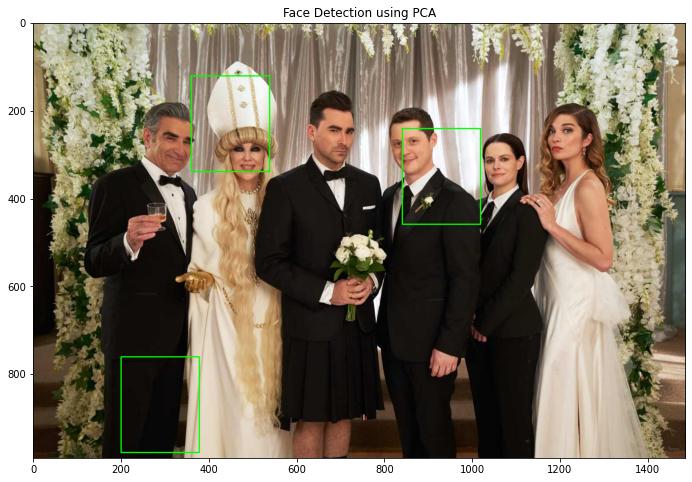

In [ ]:
# the dataset was taken from celebsA subset provided
# model was made using images from 000101 to 000200
# the thresholds were adjusted to this dataset and may change with other dataset 

image_height = 218
image_width = 178
threshold = 83.3
upper_threshold = 83.45

dataset_path = '/content/drive/My Drive/ECSE 415/Assignment 2/Celebs/'
path = '/content/drive/My Drive/ECSE 415/Assignment 2/'

#Train a PCA using celeb dataset 
eigenfaces, weights, mean_face, D = pca(dataset_path, 15)
image = cv2.imread(path+'schitt\'s_creek_group_photo.jpeg', cv2.COLOR_BGR2GRAY)

         #sliding_window(image,winW, winH, T1, T2, D, mean_face, eigenfaces)
result = sliding_window(image, image_width, image_height, threshold, upper_threshold, D, mean_face, eigenfaces)

plt.figure(figsize=(12,8))
plt.title("Face Detection using PCA")

# plot image and invert BGR channels to form RGB
plt.imshow(result[...,::-1])


### How well does the method work? How many false positive face detections do you get?

The face detector works rather poorly as only 2/6 faces are detected. The detector got 1 fasle positive.

##Viola-Jones face detector

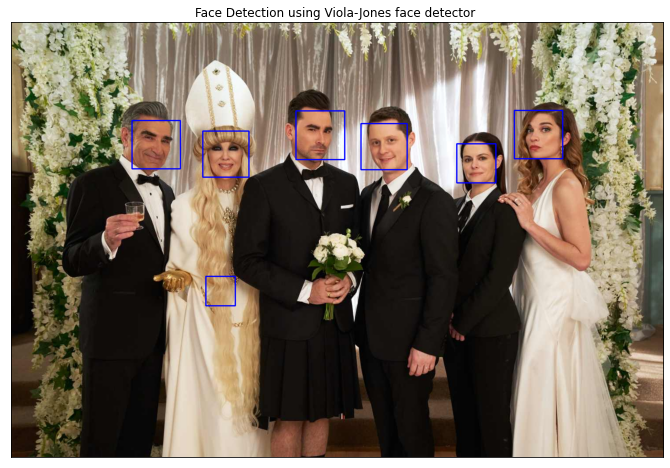

In [ ]:
# implementation of Viola-Jones face detector
# credit: most code has been taken from tutorial 4


face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/ECSE 415/Assignment 2/haarcascade_frontalface_default.xml')

img = cv2.imread(path+'schitt\'s_creek_group_photo.jpeg', cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1,8)

for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

plt.figure(figsize=(12,8))
plt.imshow(img[...,::-1])
plt.title("Face Detection using Viola-Jones face detector ")
plt.xticks(())
plt.yticks(())
plt.show()

### Use an existing implementation of the Viola-Jones face detector, and compare the results with your detector (e.g. how many false positives do you obtain?). Under what conditions would you expect the Viola-Jones detector to work when PCA does not? 

Viola-Jones face detector works much better than PCA. It detects all the faces and has 1 false positive.
Viola-Jones face detector is more robust to lightening conditons, exposure and face angles. Since it is based on classifer boosting, it will work better even if the training data has a lot of non-face images.  
